<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Neural-Network-Classifier" data-toc-modified-id="Neural-Network-Classifier-1">Neural Network Classifier</a></span></li><li><span><a href="#Apply-NeuralNetworkClassifier-to-Handwritten-Digits" data-toc-modified-id="Apply-NeuralNetworkClassifier-to-Handwritten-Digits-2">Apply <code>NeuralNetworkClassifier</code> to Handwritten Digits</a></span></li><li><span><a href="#Experiments" data-toc-modified-id="Experiments-3">Experiments</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-4">Grading</a></span></li><li><span><a href="#Extra-Credit" data-toc-modified-id="Extra-Credit-5">Extra Credit</a></span></li></ul></div>

# Neural Network Classifier

You may start with your `NeuralNetwork` class from A2, or start with the [implementation defined here](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A2solution.tar) in which all functions meant be called by other functions in this class start with an underscore character. Implement the subclass `NeuralNetworkClassifier` that extends `NeuralNetwork` as discussed in class.  Your `NeuralNetworkClassifier` implementation should rely on inheriting functions from `NeuralNetwork` as much as possible. 

Your `neuralnetworks.py` file (notice it is plural) will now contain two classes, `NeuralNetwork` and `NeuralNetworkClassifier`.

In `NeuralNetworkClassifier` replace the `error_f` function with one called `_neg_log_likelihood_f` and pass it instead of `error_f` into the optimization functions.

Here are some example tests.

In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import numpy as np
import neuralnetworks as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
T = np.array([[0], [1], [1], [0]])
X, T

(array([[0, 0],
        [1, 0],
        [0, 1],
        [1, 1]]),
 array([[0],
        [1],
        [1],
        [0]]))

In [44]:
np.random.seed(111)
nnet = nn.NeuralNetworkClassifier(2, [10], 2)

In [45]:
print(nnet)

NeuralNetworkClassifier(2, [10], 2)


In [46]:
nnet.Ws

[array([[0.35343662, 0.09761247, 0.25175879, 0.4441339 , 0.17050614,
         0.08611927, 0.01297787, 0.24261672, 0.1378032 , 0.19494589],
        [0.57198811, 0.13725143, 0.0468766 , 0.38659388, 0.35867477,
         0.15834035, 0.26917306, 0.06833965, 0.04269942, 0.52006221],
        [0.4583945 , 0.48530311, 0.47066025, 0.57212805, 0.3332892 ,
         0.46982855, 0.24324799, 0.01584709, 0.26219591, 0.06081004]]),
 array([[0.24640112, 0.21037283],
        [0.17043996, 0.08268264],
        [0.30105116, 0.04162125],
        [0.18555481, 0.14624395],
        [0.12212025, 0.21945476],
        [0.09733206, 0.12076903],
        [0.09617199, 0.28559813],
        [0.27700099, 0.24538331],
        [0.01027463, 0.28443762],
        [0.28656819, 0.24319635],
        [0.14511079, 0.29148887]])]

The `softmax` function can produce errors if the denominator is close to zero.  Here is an implentation you may use to avoid some of those errors.  This assumes you have the following import in your `neuralnetworks.py` file.

`sys.float_info.epsilon` is also useful in your `_neg_log_likehood_f` function to avoid taking the `log` of zero.

In [47]:
import sys  # for sys.float_info.epsilon 

In [48]:
    def _softmax(self, Y):
        '''Apply to final layer weighted sum outputs'''
        # Trick to avoid overflow
        maxY = Y.max()       
        expY = np.exp(Y - maxY)
        denom = expY.sum(1).reshape((-1, 1))
        Y = expY / (denom + sys.float_info.epsilon)
        return Y

Replace the `error_f` function with `neg_log_likelihood`.  If you add some print statements in `_neg_log_likelihood` functions, you can compare your output to the following results.

In [49]:
nnet.train(X, T, n_epochs=1, method='sgd', learning_rate=0.01)

sgd: Epoch 1 ObjectiveF=0.70718


NeuralNetworkClassifier(2, [10], 2)

In [50]:
print(nnet)

NeuralNetworkClassifier(2, [10], 2)
 Trained for 1 epochs.
 Final data likelihood 0.7072.


Now if you comment out those print statements, you can run for more epochs without tons of output.

In [51]:
np.random.seed(111)
nnet = nn.NeuralNetworkClassifier(2, [10], 2)

In [52]:
nnet.train(X, T, 100, method='scg')

SCG: Epoch 10 ObjectiveF=0.99632
SCG: Epoch 20 ObjectiveF=0.99996
SCG: Epoch 30 ObjectiveF=1.00000


NeuralNetworkClassifier(2, [10], 2)

In [53]:
nnet.use(X)

(array([[0],
        [1],
        [1],
        [0]]),
 array([[9.99999991e-01, 9.38228261e-09],
        [1.13209730e-08, 9.99999989e-01],
        [8.63072013e-09, 9.99999991e-01],
        [9.99999990e-01, 9.87925278e-09]]))

In [54]:
def percent_correct(Y, T):
    return np.mean(T == Y) * 100

In [55]:
print(percent_correct(nnet.use(X)[0], T))
print(nnet.use(X)[0])
print(T)

100.0
[[0]
 [1]
 [1]
 [0]]
[[0]
 [1]
 [1]
 [0]]


Works!  The XOR problem was used early in the history of neural networks as a problem that cannot be solved with a linear model.  Let's try it.  It turns out our neural network code can do this if we use an empty list for the hidden unit structure!

In [56]:
nnet = nn.NeuralNetworkClassifier(2, [], 2)
nnet.train(X, T, 100, method='scg')

NeuralNetworkClassifier(2, [], 2)

In [57]:
nnet.use(X)

(array([[0],
        [1],
        [0],
        [1]]),
 array([[0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5]]))

In [58]:
percent_correct(nnet.use(X)[0], T)

50.0

A second way to evaluate a classifier is to calculate a confusion matrix. This shows the percent accuracy for each class, and also shows which classes are predicted in error.

Here is a function you can use to show a confusion matrix.

In [59]:
import pandas

def confusion_matrix(Y_classes, T):
    class_names = np.unique(T)
    table = []
    for true_class in class_names:
        row = []
        for Y_class in class_names:
            row.append(100 * np.mean(Y_classes[T == true_class] == Y_class))
        table.append(row)
    conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
    # cf.style.background_gradient(cmap='Blues').format("{:.1f} %")
    print('Percent Correct')
    return conf_matrix.style.background_gradient(cmap='Blues').format("{:.1f}")

In [60]:
confusion_matrix(nnet.use(X)[0], T)

Percent Correct


,0,1
0,50.0,50.0
1,50.0,50.0


# Apply `NeuralNetworkClassifier` to Handwritten Digits

Apply your `NeuralNetworkClassifier` to the [MNIST digits dataset](http://deeplearning.net/tutorial/gettingstarted.html).

In [61]:
import pickle
import gzip

In [62]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xtrain = train_set[0]
Ttrain = train_set[1].reshape(-1, 1)

Xval = valid_set[0]
Tval = valid_set[1].reshape(-1, 1)

Xtest = test_set[0]
Ttest = test_set[1].reshape(-1, 1)

print(Xtrain.shape, Ttrain.shape,  Xval.shape, Tval.shape,  Xtest.shape, Ttest.shape)

(50000, 784) (50000, 1) (10000, 784) (10000, 1) (10000, 784) (10000, 1)


In [63]:
28*28

784

In [64]:
print(Ttrain[0:10])
print(np.unique(Ttrain))

[[5]
 [0]
 [4]
 [1]
 [9]
 [2]
 [1]
 [3]
 [1]
 [4]]
[0 1 2 3 4 5 6 7 8 9]


In [65]:
def draw_image(image, label):
    plt.imshow(-image.reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title(label)

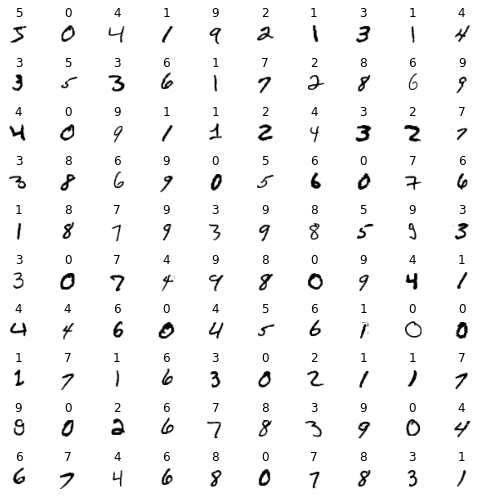

In [66]:
plt.figure(figsize=(7, 7))
for i in range(100):
    plt.subplot(10, 10, i+1)
    draw_image(Xtrain[i], Ttrain[i,0])
plt.tight_layout()

In [67]:
nnet = nn.NeuralNetworkClassifier(784, [], 10)
nnet.train(Xtrain, Ttrain, n_epochs=40, method='scg')

SCG: Epoch 4 ObjectiveF=0.95819
SCG: Epoch 8 ObjectiveF=0.96994
SCG: Epoch 12 ObjectiveF=0.97146
SCG: Epoch 16 ObjectiveF=0.97146
SCG: Epoch 20 ObjectiveF=0.97146
SCG: Epoch 24 ObjectiveF=0.97273
SCG: Epoch 28 ObjectiveF=0.97421
SCG: Epoch 32 ObjectiveF=0.97475
SCG: Epoch 36 ObjectiveF=0.97494
SCG: Epoch 40 ObjectiveF=0.97496


NeuralNetworkClassifier(784, [], 10)

In [68]:
print(nnet)

NeuralNetworkClassifier(784, [], 10)
 Trained for 40 epochs.
 Final data likelihood 0.975.


In [69]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest], [Ttrain, Tval, Ttest])]

[93.138, 92.65, 92.28]

In [70]:
nnet = nn.NeuralNetworkClassifier(784, [20], 10)
nnet.train(Xtrain, Ttrain, n_epochs=40, method='scg')

SCG: Epoch 4 ObjectiveF=0.88560
SCG: Epoch 8 ObjectiveF=0.95820
SCG: Epoch 12 ObjectiveF=0.97325
SCG: Epoch 16 ObjectiveF=0.97961
SCG: Epoch 20 ObjectiveF=0.98322
SCG: Epoch 24 ObjectiveF=0.98575
SCG: Epoch 28 ObjectiveF=0.98762
SCG: Epoch 32 ObjectiveF=0.98896
SCG: Epoch 36 ObjectiveF=0.98981
SCG: Epoch 40 ObjectiveF=0.99067


NeuralNetworkClassifier(784, [20], 10)

In [71]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest],
                                                    [Ttrain, Tval, Ttest])]

[97.47200000000001, 94.21000000000001, 93.62]

# Experiments

For each method, try various hidden layer structures, learning rates, and numbers of epochs.  Use the validation percent accuracy to pick the best hidden layers, learning rates and numbers of epochs for each method (ignore learning rates for scg).  Report training, validation and test accuracy for your best validation results for each of the three methods.

Include plots of data likelihood versus epochs, and confusion matrices, for best results for each method.

Write at least 10 sentences about what you observe in the likelihood plots, the train, validation and test accuracies, and the confusion matrices.

In [72]:
def print_nn(neural_net, method, rho, final, XTrain, TTrain, XVal, TVal, XTest, TTest):
    if method == 'scg':
            print( 'method = ', method, '\nnetwork structure = ', str(neural_net), '\n')
    else:
        print( 'method = ', method, '\nnetwork structure = ', str(neural_net), '\nlearning rate = ', rho, '\n')
    print(['Train', 'Validate'])
    print([percent_correct(neural_net.use(_X)[0], _T) for _X, _T in zip([XTrain, XVal],
                                                    [TTrain, TVal])], '\n')
    if final:
        print(['Test'])
        print([percent_correct(neural_net.use(_X)[0], _T) for _X, _T in zip([XTest],
                                                    [TTest])], '\n')
        display(confusion_matrix(neural_net.use(XTest)[0], TTest))
        plt.figure()
        plt.plot(neural_net.get_error_trace())
        plt.xlabel('Epoch')
        plt.ylabel('Data Likelihood');

In [73]:
n_epochs = 100
rho = 0.01
structure = [20]


nnet_0_sgd = nn.NeuralNetworkClassifier(784, structure, 10)
nnet_0_sgd.train(Xtrain, Ttrain, n_epochs, method='sgd', learning_rate=rho, verbose=False)
print_nn(nnet_0_sgd, 'sgd', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)
    
nnet_0_adam = nn.NeuralNetworkClassifier(784, structure, 10)
nnet_0_adam.train(Xtrain, Ttrain, n_epochs, method='adam', learning_rate=rho, verbose=False)     
print_nn(nnet_0_adam, 'adam', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)

nnet_0_scg = nn.NeuralNetworkClassifier(784, structure, 10)
nnet_0_scg.train(Xtrain, Ttrain, n_epochs, method='scg', learning_rate=rho, verbose=False)
print_nn(nnet_0_scg, 'scg', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)

method =  sgd 
network structure =  NeuralNetworkClassifier(784, [20], 10)
 Trained for 100 epochs.
 Final data likelihood 0.8108. 
learning rate =  0.01 

['Train', 'Validate']
[27.945999999999998, 28.110000000000003] 

method =  adam 
network structure =  NeuralNetworkClassifier(784, [20], 10)
 Trained for 100 epochs.
 Final data likelihood 0.9801. 
learning rate =  0.01 

['Train', 'Validate']
[94.74000000000001, 92.66] 

method =  scg 
network structure =  NeuralNetworkClassifier(784, [20], 10)
 Trained for 100 epochs.
 Final data likelihood 0.9965. 

['Train', 'Validate']
[99.356, 93.22] 



In [74]:
n_epochs = 500
rho = 0.001
structure = [20, 20, 10]
    
nnet_1_sgd = nn.NeuralNetworkClassifier(784, structure, 10)
nnet_1_sgd.train(Xtrain, Ttrain, n_epochs, method='sgd', learning_rate=rho, verbose=False)
print_nn(nnet_1_sgd, 'sgd', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)
    
nnet_1_adam = nn.NeuralNetworkClassifier(784, structure, 10)
nnet_1_adam.train(Xtrain, Ttrain, n_epochs, method='adam', learning_rate=rho, verbose=False)     
print_nn(nnet_1_adam, 'adam', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)

nnet_1_scg = nn.NeuralNetworkClassifier(784, structure, 10)
nnet_1_scg.train(Xtrain, Ttrain, n_epochs, method='scg', learning_rate=rho, verbose=False)
print_nn(nnet_1_scg, 'scg', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)

method =  sgd 
network structure =  NeuralNetworkClassifier(784, [20, 20, 10], 10)
 Trained for 500 epochs.
 Final data likelihood 0.7977. 
learning rate =  0.001 

['Train', 'Validate']
[12.134, 11.75] 

method =  adam 
network structure =  NeuralNetworkClassifier(784, [20, 20, 10], 10)
 Trained for 500 epochs.
 Final data likelihood 0.9405. 
learning rate =  0.001 

['Train', 'Validate']
[79.404, 75.92999999999999] 

method =  scg 
network structure =  NeuralNetworkClassifier(784, [20, 20, 10], 10)
 Trained for 500 epochs.
 Final data likelihood 0.998. 

['Train', 'Validate']
[99.58399999999999, 92.03] 



In [75]:
n_epochs = 50
rho = 0.05
structure = []
    
nnet_2_sgd = nn.NeuralNetworkClassifier(784, structure, 10)
nnet_2_sgd.train(Xtrain, Ttrain, n_epochs, method='sgd', learning_rate=rho, verbose=False)
print_nn(nnet_2_sgd, 'sgd', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)
    
nnet_2_adam = nn.NeuralNetworkClassifier(784, structure, 10)
nnet_2_adam.train(Xtrain, Ttrain, n_epochs, method='adam', learning_rate=rho, verbose=False)     
print_nn(nnet_2_adam, 'adam', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)

nnet_2_scg = nn.NeuralNetworkClassifier(784, structure, 10)
nnet_2_scg.train(Xtrain, Ttrain, n_epochs, method='scg', learning_rate=rho, verbose=False)
print_nn(nnet_2_scg, 'scg', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)

method =  sgd 
network structure =  NeuralNetworkClassifier(784, [], 10)
 Trained for 50 epochs.
 Final data likelihood 0.9542. 
learning rate =  0.05 

['Train', 'Validate']
[87.17399999999999, 88.71] 

method =  adam 
network structure =  NeuralNetworkClassifier(784, [], 10)
 Trained for 50 epochs.
 Final data likelihood 0.02722. 
learning rate =  0.05 

['Train', 'Validate']
[10.106, 9.91] 

method =  scg 
network structure =  NeuralNetworkClassifier(784, [], 10)
 Trained for 50 epochs.
 Final data likelihood 0.9697. 

['Train', 'Validate']
[91.692, 92.09] 



In [76]:
n_epochs = 750
rho = 0.025
structure = [20, 15, 10, 5 ]
    
nnet_3_sgd = nn.NeuralNetworkClassifier(784, structure, 10)
nnet_3_sgd.train(Xtrain, Ttrain, n_epochs, method='sgd', learning_rate=rho, verbose=False)
print_nn(nnet_3_sgd, 'sgd', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)
    
nnet_3_adam = nn.NeuralNetworkClassifier(784, structure, 10)
nnet_3_adam.train(Xtrain, Ttrain, n_epochs, method='adam', learning_rate=rho, verbose=False)     
print_nn(nnet_3_adam, 'adam', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)

nnet_3_scg = nn.NeuralNetworkClassifier(784, structure, 10)
nnet_3_scg.train(Xtrain, Ttrain, n_epochs, method='scg', learning_rate=rho, verbose=False)
print_nn(nnet_3_scg, 'scg', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)

method =  sgd 
network structure =  NeuralNetworkClassifier(784, [20, 15, 10, 5], 10)
 Trained for 750 epochs.
 Final data likelihood 0.8285. 
learning rate =  0.025 

['Train', 'Validate']
[20.634, 20.07] 

method =  adam 
network structure =  NeuralNetworkClassifier(784, [20, 15, 10, 5], 10)
 Trained for 750 epochs.
 Final data likelihood 0.9865. 
learning rate =  0.025 

['Train', 'Validate']
[97.224, 88.05] 

method =  scg 
network structure =  NeuralNetworkClassifier(784, [20, 15, 10, 5], 10)
 Trained for 750 epochs.
 Final data likelihood 0.9964. 

['Train', 'Validate']
[99.376, 91.63] 



Best Cases
method =  sgd 
network structure =  NeuralNetworkClassifier(784, [], 10)
 Trained for 50 epochs.
 Final data likelihood 0.9542. 
learning rate =  0.025 

['Train', 'Validate']
[87.17399999999999, 88.71] 

['Test']
[87.87] 

Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,95.5,0.0,0.4,0.2,0.0,1.7,1.5,0.2,0.4,0.0
1,0.0,96.6,0.4,0.5,0.1,0.2,0.4,0.0,1.9,0.0
2,1.6,2.5,82.2,2.2,1.7,0.0,2.1,2.5,4.7,0.3
3,0.3,1.3,2.3,86.0,0.1,3.4,1.0,2.4,2.3,1.0
4,0.1,0.9,0.5,0.1,91.6,0.2,1.5,0.4,0.4,4.2
5,1.8,1.7,0.7,5.8,2.9,78.3,2.6,1.7,2.6,2.0
6,1.6,1.0,0.7,0.0,1.4,1.5,93.5,0.1,0.2,0.0
7,0.1,3.1,1.6,0.5,1.0,0.0,0.1,88.9,0.3,4.5
8,1.3,4.1,1.1,3.4,2.1,3.8,0.9,1.6,79.2,2.5
9,1.5,1.1,0.6,1.2,5.9,0.6,0.0,3.7,0.3,85.1


method =  adam 
network structure =  NeuralNetworkClassifier(784, [20], 10)
 Trained for 100 epochs.
 Final data likelihood 0.9801. 
learning rate =  0.025 

['Train', 'Validate']
[94.74000000000001, 92.66] 

['Test']
[92.51] 

Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,96.6,0.0,0.0,0.3,0.1,0.9,1.4,0.4,0.2,0.0
1,0.0,97.1,0.4,0.2,0.2,0.3,0.3,0.2,1.4,0.0
2,1.0,0.4,91.0,2.4,0.8,0.4,0.9,1.3,1.9,0.0
3,0.2,0.3,1.4,91.6,0.2,3.1,0.0,1.3,1.6,0.4
4,0.0,0.3,0.5,0.1,94.3,0.1,1.5,0.4,0.3,2.4
5,1.0,0.3,0.4,3.5,0.6,87.9,1.5,0.8,3.5,0.6
6,1.3,0.4,0.8,0.1,0.8,1.5,94.7,0.0,0.4,0.0
7,0.2,0.9,2.1,1.1,0.9,0.2,0.0,91.1,0.2,3.4
8,0.5,0.6,0.9,2.6,1.7,2.7,0.8,0.9,88.4,0.8
9,0.7,0.2,0.2,1.6,2.4,0.9,0.0,2.0,0.5,91.6


method =  scg 
network structure =  NeuralNetworkClassifier(784, [20], 10)
 Trained for 100 epochs.
 Final data likelihood 0.9965. 

['Train', 'Validate']
[99.356, 93.22] 

['Test']
[93.23] 

Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,96.3,0.0,0.4,0.3,0.1,1.0,1.1,0.5,0.2,0.0
1,0.1,97.9,0.4,0.2,0.0,0.2,0.4,0.3,0.6,0.0
2,0.7,1.0,92.0,2.2,0.8,0.3,0.7,0.9,1.4,0.2
3,0.1,0.5,1.3,93.9,0.2,1.4,0.1,0.8,1.1,0.7
4,0.1,0.4,0.7,0.2,93.1,0.1,1.0,0.6,0.4,3.4
5,0.9,0.6,0.7,2.6,0.7,89.9,1.2,0.4,2.5,0.6
6,0.9,0.6,0.9,0.0,0.6,1.5,95.0,0.1,0.3,0.0
7,0.0,0.6,1.8,0.8,0.4,0.2,0.0,93.2,0.4,2.7
8,0.4,0.7,0.7,1.7,0.9,2.2,1.0,1.2,89.7,1.3
9,0.8,0.2,0.2,0.9,3.6,1.0,0.0,2.1,0.8,90.5


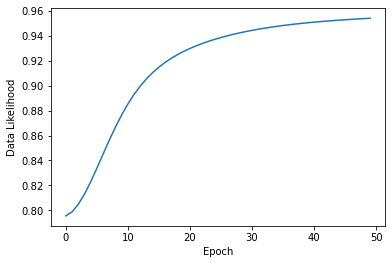

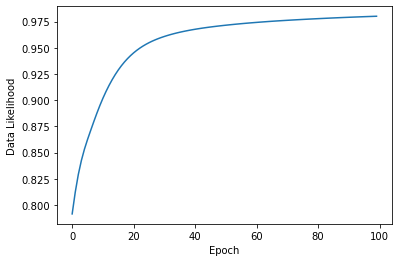

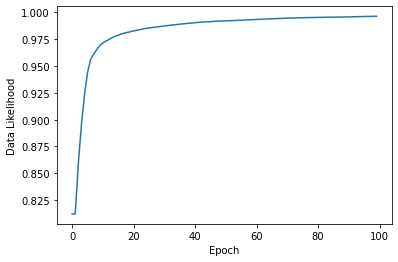

In [77]:
print('Best Cases')
print_nn(nnet_2_sgd, 'sgd', rho, True, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)     
print_nn(nnet_0_adam, 'adam', rho, True, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)
print_nn(nnet_0_scg, 'scg', rho, True, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)

# Discussion:
The training, validation and test accuracy for the setups with the best validation results for each of the three methods are listed above. I also included plots of data likelihood versus epochs, and confusion matrices, for the best results for each method.</br>
I constructed my experiments to test each method (sgd, adam, scg) using the same structure, learning rate, and number of epochs for a given experiment cell. I varied these 3 values across 4 total cells, testing 4 separate scenarios for each method for a total of 12 different scenarios tested. The printed results of these runs are available above the final validation output.</br>
I began with n_epochs = 100, rho = 0.01, and a fairly simply structure of 1 hidden layer with 20 units. The results I attained were poor for sgd but very good for adam and scg. I decided to try something more complex n_epochs = 500, rho = 0.00 three hidden layers with 20, 20, and 10 layers respectively. The results here were even worse for sgd and adam with scg performing slightly less well based on the validation results. So I decided to go less complex. I used n_epochs = 50, rho = 0.05, zero hidden layers.The sgd performed significantly better on this run, adam was poor, and scg was similar to other runs. I then did a final run with increased complexity just for kicks. n_epochs = 750 rho = 0.025 and 4 hidden layers with 20, 15, 10, 5 units respectively. sgd was poor, adam was ok and scg was pretty good though not better then other attempts.</br>

After reviewing the available data I utilized sgd from my third run, adam from my first and scg from my first. I calculated the test set error on these three. In each case the validation error was very similar to the test error. The highest performer was scg, with a test percent correct of 93.23, adam was a close second with 92.51 and sgd was third with 87.87. It seemed like the fairly simple single hidden layer strategy produced the best results. More of an argument for keeping strategies simple. 

# Grading

COMING SOON.  Download [A3grader.tar](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A3grader.tar), extract `A3grader.py` before running the following cell.

In [1]:
%run -i A3grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Feudale-A3.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

## Testing inheritance ####################################################################

    correct = issubclass(NeuralNetworkClassifier, NeuralNetwork)


--- 10/10 points. NeuralNetworkClassifier correctly extends NeuralNetwork.

## Testing inheritance ####################################################################

    import inspect
    forward_func = [f for f in inspect.classify_class_attrs(NeuralNetworkClassifier) if (f.name == 'forward' or f.name == '_forward')]
    correct = forward_func[0].defining_class == NeuralNetwork


--- 5/5 points. NeuralNetworkClassifier forward function correctly inherited from NeuralNetwork.

## Testing inheritance ####################################################################

    import inspect
  

# Extra Credit

Repeat the above experiments with a different data set.  Randonly partition your data into training, validaton and test parts if not already provided.  Write in markdown cells descriptions of the data and your results.

In [33]:
def partition(X, T, train_fraction, validate_fraction):
    n_samples = X.shape[0]
    rows = np.arange(n_samples)
    np.random.shuffle(rows)
    
    n_train = round(n_samples * train_fraction)
    n_validate = round(n_samples * validate_fraction)
    
    Xtrain = X[rows[:n_train], :]
    Ttrain = T[rows[:n_train], :]
    Xvalidate = X[rows[n_train:n_train + n_validate], :]
    Tvalidate = T[rows[n_train:n_train + n_validate], :]
    Xtest = X[rows[n_train + n_validate:], :]
    Ttest = T[rows[n_train + n_validate:], :]
    
    return Xtrain, Ttrain, Xvalidate, Tvalidate, Xtest, Ttest

In [36]:
n_epochs = 100
rho = 0.01
structure = [20]

wine_nnet_0_sgd = nn.NeuralNetworkClassifier(Xtrain.shape[1], structure, len(np.unique(T)))
wine_nnet_0_sgd.train(Xtrain, Ttrain, n_epochs, method='sgd', learning_rate=rho, verbose=False)
print_nn(wine_nnet_0_sgd, 'sgd', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)
    
wine_nnet_0_adam = nn.NeuralNetworkClassifier(Xtrain.shape[1], structure, len(np.unique(T)))
wine_nnet_0_adam.train(Xtrain, Ttrain, n_epochs, method='adam', learning_rate=rho, verbose=False)     
print_nn(wine_nnet_0_adam, 'adam', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)

wine_nnet_0_scg = nn.NeuralNetworkClassifier(Xtrain.shape[1], structure, len(np.unique(T)))
wine_nnet_0_scg.train(Xtrain, Ttrain, n_epochs, method='scg', learning_rate=rho, verbose=False)
print_nn(wine_nnet_0_scg, 'scg', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)

method =  sgd 
network structure =  NeuralNetworkClassifier(11, [20], 7)
 Trained for 100 epochs.
 Final data likelihood 0.782. 
learning rate =  0.01 

['Train', 'Validate']
[40.14803471158754, 42.44897959183673] 

method =  adam 
network structure =  NeuralNetworkClassifier(11, [20], 7)
 Trained for 100 epochs.
 Final data likelihood 0.8615. 
learning rate =  0.01 

['Train', 'Validate']
[55.666156202143945, 55.714285714285715] 

method =  scg 
network structure =  NeuralNetworkClassifier(11, [20], 7)
 Trained for 100 epochs.
 Final data likelihood 0.8761. 

['Train', 'Validate']
[60.694231750893316, 54.48979591836734] 



In [37]:
n_epochs = 500
rho = 0.001
structure = [20, 20, 10]

wine_nnet_1_sgd = nn.NeuralNetworkClassifier(Xtrain.shape[1], structure, len(np.unique(T)))
wine_nnet_1_sgd.train(Xtrain, Ttrain, n_epochs, method='sgd', learning_rate=rho, verbose=False)
print_nn(wine_nnet_1_sgd, 'sgd', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)
    
wine_nnet_1_adam = nn.NeuralNetworkClassifier(Xtrain.shape[1], structure, len(np.unique(T)))
wine_nnet_1_adam.train(Xtrain, Ttrain, n_epochs, method='adam', learning_rate=rho, verbose=False)     
print_nn(wine_nnet_1_adam, 'adam', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)

wine_nnet_1_scg = nn.NeuralNetworkClassifier(Xtrain.shape[1], structure, len(np.unique(T)))
wine_nnet_1_scg.train(Xtrain, Ttrain, n_epochs, method='scg', learning_rate=rho, verbose=False)
print_nn(wine_nnet_1_scg, 'scg', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)

method =  sgd 
network structure =  NeuralNetworkClassifier(11, [20, 20, 10], 7)
 Trained for 500 epochs.
 Final data likelihood 0.7736. 
learning rate =  0.001 

['Train', 'Validate']
[25.370086778968865, 25.102040816326532] 

method =  adam 
network structure =  NeuralNetworkClassifier(11, [20, 20, 10], 7)
 Trained for 500 epochs.
 Final data likelihood 0.8554. 
learning rate =  0.001 

['Train', 'Validate']
[54.90045941807045, 53.87755102040816] 

method =  scg 
network structure =  NeuralNetworkClassifier(11, [20, 20, 10], 7)
 Trained for 500 epochs.
 Final data likelihood 0.9304. 

['Train', 'Validate']
[80.98519652884124, 58.97959183673469] 



In [38]:
n_epochs = 50
rho = 0.05
structure = []

wine_nnet_2_sgd = nn.NeuralNetworkClassifier(Xtrain.shape[1], structure, len(np.unique(T)))
wine_nnet_2_sgd.train(Xtrain, Ttrain, n_epochs, method='sgd', learning_rate=rho, verbose=False)
print_nn(wine_nnet_0_sgd, 'sgd', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)
    
wine_nnet_2_adam = nn.NeuralNetworkClassifier(Xtrain.shape[1], structure, len(np.unique(T)))
wine_nnet_2_adam.train(Xtrain, Ttrain, n_epochs, method='adam', learning_rate=rho, verbose=False)     
print_nn(wine_nnet_0_adam, 'adam', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)

wine_nnet_2_scg = nn.NeuralNetworkClassifier(Xtrain.shape[1], structure, len(np.unique(T)))
wine_nnet_2_scg.train(Xtrain, Ttrain, n_epochs, method='scg', learning_rate=rho, verbose=False)
print_nn(wine_nnet_2_scg, 'scg', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)

method =  sgd 
network structure =  NeuralNetworkClassifier(11, [20], 7)
 Trained for 100 epochs.
 Final data likelihood 0.782. 
learning rate =  0.05 

['Train', 'Validate']
[40.14803471158754, 42.44897959183673] 

method =  adam 
network structure =  NeuralNetworkClassifier(11, [20], 7)
 Trained for 100 epochs.
 Final data likelihood 0.8615. 
learning rate =  0.05 

['Train', 'Validate']
[55.666156202143945, 55.714285714285715] 

method =  scg 
network structure =  NeuralNetworkClassifier(11, [], 7)
 Trained for 50 epochs.
 Final data likelihood 0.8564. 

['Train', 'Validate']
[54.26237876467586, 54.48979591836734] 



In [39]:
n_epochs = 2000
rho = 0.025
structure = [20, 15, 10, 5 ]

wine_nnet_3_sgd = nn.NeuralNetworkClassifier(Xtrain.shape[1], structure, len(np.unique(T)))
wine_nnet_3_sgd.train(Xtrain, Ttrain, n_epochs, method='sgd', learning_rate=rho, verbose=False)
print_nn(wine_nnet_3_sgd, 'sgd', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)
    
wine_nnet_3_adam = nn.NeuralNetworkClassifier(Xtrain.shape[1], structure, len(np.unique(T)))
wine_nnet_3_adam.train(Xtrain, Ttrain, n_epochs, method='adam', learning_rate=rho, verbose=False)     
print_nn(wine_nnet_3_adam, 'adam', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)

wine_nnet_3_scg = nn.NeuralNetworkClassifier(Xtrain.shape[1], structure, len(np.unique(T)))
wine_nnet_3_scg.train(Xtrain, Ttrain, n_epochs, method='scg', learning_rate=rho, verbose=False)
print_nn(wine_nnet_3_scg, 'scg', rho, False, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)

method =  sgd 
network structure =  NeuralNetworkClassifier(11, [20, 15, 10, 5], 7)
 Trained for 2000 epochs.
 Final data likelihood 0.8316. 
learning rate =  0.025 

['Train', 'Validate']
[44.946401225114855, 46.93877551020408] 

method =  adam 
network structure =  NeuralNetworkClassifier(11, [20, 15, 10, 5], 7)
 Trained for 2000 epochs.
 Final data likelihood 0.9076. 
learning rate =  0.025 

['Train', 'Validate']
[73.25165900969883, 53.673469387755105] 

method =  scg 
network structure =  NeuralNetworkClassifier(11, [20, 15, 10, 5], 7)
 Trained for 2000 epochs.
 Final data likelihood 0.9211. 

['Train', 'Validate']
[78.53496681980602, 57.14285714285714] 



Best Cases
method =  sgd 
network structure =  NeuralNetworkClassifier(11, [20], 7)
 Trained for 100 epochs.
 Final data likelihood 0.782. 
learning rate =  0.025 

['Train', 'Validate']
[40.14803471158754, 42.44897959183673] 

['Test']
[43.06122448979592] 

Percent Correct


,3.0,4.0,5.0,6.0,7.0,8.0,9.0
3.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,91.7,8.3,0.0,0.0
5.0,0.0,5.9,0.7,90.1,3.3,0.0,0.0
6.0,0.0,3.6,0.0,87.5,8.9,0.0,0.0
7.0,0.0,3.5,0.0,80.2,16.3,0.0,0.0
8.0,0.0,8.3,0.0,91.7,0.0,0.0,0.0
9.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0


method =  adam 
network structure =  NeuralNetworkClassifier(11, [], 7)
 Trained for 50 epochs.
 Final data likelihood 0.8537. 
learning rate =  0.025 

['Train', 'Validate']
[53.49668198060235, 54.285714285714285] 

['Test']
[55.91836734693878] 

Percent Correct


,3.0,4.0,5.0,6.0,7.0,8.0,9.0
3.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
4.0,0.0,0.0,66.7,33.3,0.0,0.0,0.0
5.0,0.0,0.0,53.9,46.1,0.0,0.0,0.0
6.0,0.0,0.9,17.0,75.9,6.2,0.0,0.0
7.0,0.0,0.0,4.7,69.8,25.6,0.0,0.0
8.0,0.0,0.0,0.0,50.0,50.0,0.0,0.0
9.0,0.0,0.0,0.0,50.0,50.0,0.0,0.0


method =  scg 
network structure =  NeuralNetworkClassifier(11, [20, 15, 10, 5], 7)
 Trained for 2000 epochs.
 Final data likelihood 0.9211. 

['Train', 'Validate']
[78.53496681980602, 57.14285714285714] 

['Test']
[58.36734693877551] 

Percent Correct


,3.0,4.0,5.0,6.0,7.0,8.0,9.0
3.0,0.0,0.0,50.0,0.0,50.0,0.0,0.0
4.0,0.0,33.3,16.7,50.0,0.0,0.0,0.0
5.0,0.0,3.9,71.7,20.4,3.3,0.7,0.0
6.0,0.0,0.4,25.4,56.2,16.1,1.8,0.0
7.0,0.0,0.0,8.1,38.4,51.2,2.3,0.0
8.0,0.0,0.0,0.0,33.3,41.7,25.0,0.0
9.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0


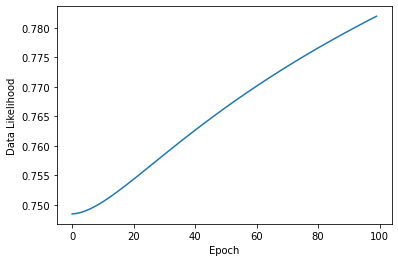

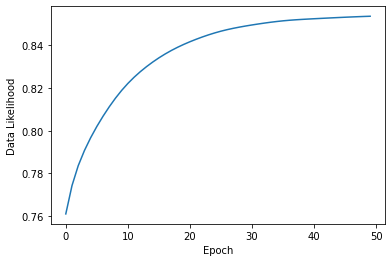

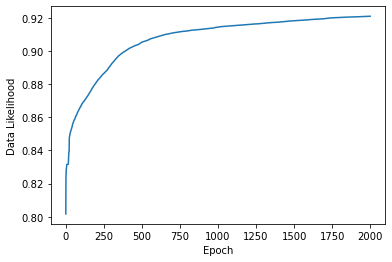

In [40]:
print('Best Cases')
print_nn(wine_nnet_0_sgd, 'sgd', rho, True, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)     
print_nn(wine_nnet_2_adam, 'adam', rho, True, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)
print_nn(wine_nnet_3_scg, 'scg', rho, True, Xtrain, Ttrain, Xval, Tval, Xtest, Ttest)

I chose the Wine Quality dataset. The same one I used for assignment one: http://archive.ics.uci.edu/ml/datasets/Wine+Quality

I did so because it was setup for classification and because I recently visited the Finger Lakes in upstate New York, which is known for producing good wine. I had the option of either the red wine or white wine dataset within these. I chose white because the Finger Lakes are known for their Rieslings. I also wanted to see if a neural network with several inputs performed better then a single variable approach. <br>

I started by importing the data and getting it cleaned up. I had to play around with it to get it into a shape amenable to training and testing. I separated this into training, validation and test data. I wanted to predict quality using the rest of the other variables.<br>

I ran it through the same training I did for the numbers dataset. The only difference was that in the final cell I did 2000 epochs. The results of the runs are above.
The test percent correct were actually slightly better than validation in all three cases. All 3 were fairly close to their validation percent correct values. None did better than 60%/. However, a look at the confusion matrices showed that most predictions were usually mis-classifying directly to the right or left of the target. This data was for wine quality on a scale from 1 to 10, so essentially the network was producing mainly off by one or two errors. It was still well trained to be within one of the quality for a given wine. Which is pretty good. This would be a good argument for this particular problem being better served via a regression model (as I had done before with good results).  